# Gridded Data and the `xarray` library
The website lessons covered in this lesson are:
- [Lesson 3.1](https://nasa-sarp.github.io/sarp_lessons/sarp_lessons/1_python_progression/3-gridded_data/3-1_xarray.html) Intro to xarray

## importing libraries

In [1]:
math.factorial(3)

NameError: name 'math' is not defined

In [2]:
import math

In [3]:
math.factorial(3)

6

## xarray

In [1]:
import xarray as x

_You will probably almost never make dataarrays from scratch_

In [27]:
# Data values
air_temps = [
    [80, 80, 81, 83, 82, 80], [81, 80, 81, 83, 83, 82], [81, 81, 83, 84, 84, 83], 
    [79, 80, 83, 85, 85, 85], [78, 77, 80, 85, 86, 87]
]
# Coordinate values
lats = [36, 37, 38, 39, 40]
lons = [-80, -79, -78, -77, -76, -75]
# Assemble the DataArray
temps = xr.DataArray(
    data=air_temps, dims=['latitude', 'longitude'], 
    coords=[lats, lons], name='air temperature')

In [28]:
temps

<xarray.DataArray 'air temperature' (latitude: 5, longitude: 6)> Size: 240B
array([[80, 80, 81, 83, 82, 80],
       [81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83],
       [79, 80, 83, 85, 85, 85],
       [78, 77, 80, 85, 86, 87]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

What are we looking at? data, dimensions, and coordinate values

The data structure above is called a **DataArray** and it is one of the two core data structures of xarray.

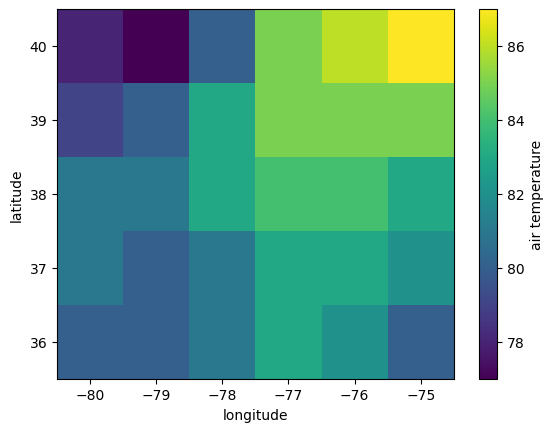

In [10]:
temps.plot()

Describing the DataArray

In [21]:
temps.dims

('latitude', 'altitude')

In [23]:
temps.coords

Coordinates:
  * latitude  (latitude) int64 40B 36 37 38 39 40
  * altitude  (altitude) int64 48B 0 100 200 300 400 500

In [24]:
temps.data

array([[50, 50, 51, 53, 52, 50],
       [51, 50, 51, 53, 53, 52],
       [51, 51, 53, 54, 54, 53],
       [49, 50, 53, 55, 55, 55],
       [48, 47, 50, 55, 56, 57]])

In [25]:
temps.shape

(5, 6)

:::{admonition} Vocabulary
:class: tip
**Property:** Information attached to a data structure that describes it (Ex. the size of an array). Usually accessed with dot notation (`my_dataarray.my_property`)
:::

In [19]:
# Data values
humidity_list = [
    [[50, 50, 51, 53, 52, 50], [51, 50, 51, 53, 53, 52], [51, 51, 53, 54, 54, 53], 
    [49, 50, 53, 55, 55, 55], [48, 47, 50, 55, 56, 57]],
    [[50, 50, 51, 53, 52, 50], [51, 50, 51, 53, 53, 52], [51, 51, 53, 54, 54, 53], 
    [49, 50, 53, 55, 55, 55], [48, 47, 50, 55, 56, 57]],
    [[50, 50, 51, 53, 52, 50], [51, 50, 51, 53, 53, 52], [51, 51, 53, 54, 54, 53], 
    [49, 50, 53, 55, 55, 55], [48, 47, 50, 55, 56, 57]],
    [[50, 50, 51, 53, 52, 50], [51, 50, 51, 53, 53, 52], [51, 51, 53, 54, 54, 53], 
    [49, 50, 53, 55, 55, 55], [48, 47, 50, 55, 56, 57]],
]
# Coordinate values
lats = [36, 37, 38, 39, 40]
lons = [-80, -79, -78, -77, -76, -75]
altitude = [0, 100, 200, 300]
# Assemble the DataArray
humidity = xr.DataArray(
    data=humidity_list, dims=['altitude', 'latitude', 'longitude',], 
    coords=[altitude, lats, lons], name='humidity')

In [20]:
humidity

<xarray.DataArray 'humidity' (altitude: 4, latitude: 5, longitude: 6)> Size: 960B
array([[[50, 50, 51, 53, 52, 50],
        [51, 50, 51, 53, 53, 52],
        [51, 51, 53, 54, 54, 53],
        [49, 50, 53, 55, 55, 55],
        [48, 47, 50, 55, 56, 57]],

       [[50, 50, 51, 53, 52, 50],
        [51, 50, 51, 53, 53, 52],
        [51, 51, 53, 54, 54, 53],
        [49, 50, 53, 55, 55, 55],
        [48, 47, 50, 55, 56, 57]],

       [[50, 50, 51, 53, 52, 50],
        [51, 50, 51, 53, 53, 52],
        [51, 51, 53, 54, 54, 53],
        [49, 50, 53, 55, 55, 55],
        [48, 47, 50, 55, 56, 57]],

       [[50, 50, 51, 53, 52, 50],
        [51, 50, 51, 53, 53, 52],
        [51, 51, 53, 54, 54, 53],
        [49, 50, 53, 55, 55, 55],
        [48, 47, 50, 55, 56, 57]]])
Coordinates:
  * altitude   (altitude) int64 32B 0 100 200 300
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

:::{admonition} 📝 Check your understanding
:class: tip

🗳️🗳️🗳️

What are the dimensions of the `humidity` DataArray above?

:::

## Indexing and selecting values

### Method 1: `.sel()` -- selection by label

_“What is the air temperature at 37$^o$N and 19$^o$E?”_

In [30]:
# Get the value of the array where latitude is EQUAL TO 37 and longitude is EQUAL TO -19
temps.sel(latitude=37, longitude=-79)


<xarray.DataArray 'air temperature' ()> Size: 8B
array(80)
Coordinates:
    latitude   int64 8B 37
    longitude  int64 8B -79

_“What is the air temperatures at all the longitudes and between 37-39$^o$N?”_

In [ ]:
# Select all the data between (and including) 37 and 39 degrees north
temps.sel(latitude=slice(37, 39))

### Method 2: `.isel()` -- selection by index

_“What is the air temperature at the very first latitude and longitude?”_

In [31]:
temps.isel(latitude=0, longitude=0)

<xarray.DataArray 'air temperature' ()> Size: 8B
array(80)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -80

In [34]:
temps.isel(latitude=slice(1, 3))

<xarray.DataArray 'air temperature' (latitude: 2, longitude: 6)> Size: 96B
array([[81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83]])
Coordinates:
  * latitude   (latitude) int64 16B 37 38
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

### Bonus method (if you really love numpy) `[]`

In [32]:
temps[0, 3]

<xarray.DataArray 'air temperature' ()> Size: 8B
array(83)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -77

## Second core data structure: `Dataset`

In [36]:
import numpy as np

In [37]:
# Create DataArray for chlorophyll-a
windspeed_values = np.random.uniform(4, high=13, size=(5, 6))
# Assemble the Dataset
air_dataset = xr.Dataset(
    data_vars={"temperature": temps, "wind_speed": (("latitude", "longitude"), windspeed_values)}
)

air_dataset

<xarray.Dataset> Size: 568B
Dimensions:      (latitude: 5, longitude: 6)
Coordinates:
  * latitude     (latitude) int64 40B 36 37 38 39 40
  * longitude    (longitude) int64 48B -80 -79 -78 -77 -76 -75
Data variables:
    temperature  (latitude, longitude) int64 240B 80 80 81 83 82 ... 80 85 86 87
    wind_speed   (latitude, longitude) float64 240B 4.055 11.0 ... 10.41 11.19

What looks different about this output from the `DataArray` output?

Accessing variables with the `[]` or `.` syntax returns a `DataArray`:

In [38]:
air_dataset['wind_speed']

<xarray.DataArray 'wind_speed' (latitude: 5, longitude: 6)> Size: 240B
array([[ 4.05539129, 10.99993767, 10.82316286,  8.26102981, 11.84473189,
         5.88766099],
       [ 9.38264168,  4.29741622,  7.25471576,  4.81159693, 12.2577804 ,
         9.24628346],
       [ 7.11414635,  5.94608444,  7.8236517 ,  6.42288598, 12.92618242,
        11.11516036],
       [ 4.89150321, 11.14185348,  5.00695659,  4.08989276, 11.90635729,
         4.78264139],
       [ 7.77827224, 12.53134288,  6.67629669, 10.91824222, 10.40936096,
        11.19214393]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

### Practice Question

For this question we will use a sample dataset that is included with xarray. Run the line below to create the `air_temps` dataset

In [41]:
air_temps = xr.tutorial.load_dataset('air_temperature')

In [42]:
air_temps

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

**A)** Is `air_temps` a `DataArray` or a `Dataset`?

**B)** How many dimensions does the dataset have? What are they?

**C)** Get the `air` data variable from the Dataset and assign it to a new Python variable

**D)** Make a plot of the air temperature at all latitudes and longitudes for January 1st 2013 at 0:00 (midnight).

**BONUS 1)** Subset the data to only the data between 50 and 20$^o$N and 110 and 60$^o$E (Note: the longitude is labelled from 0 to 360 instead of -180 to 180, so 110-60$^o$E is 250-300 longitude in this dataset).

Plot any the data for this region for any one time.

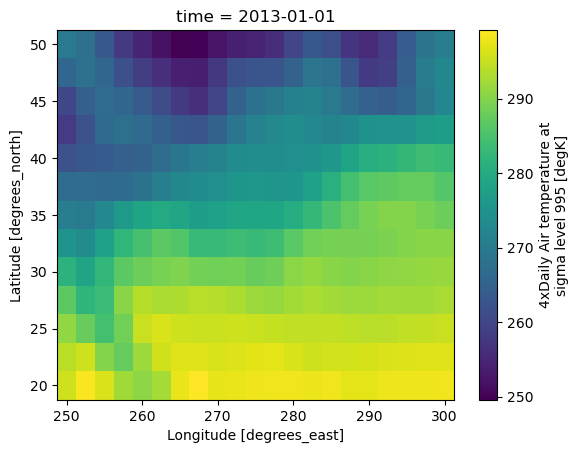

In [56]:
air_temps.air.sel(lat=slice(50, 20), lon=slice(250, 300)).isel(time=0).plot()

**BONUS 2)** You'll notice in the output that Datasets (and DataArrays) can also contain _Attributes_ which provide additional descriptions of the data (ex. title, description). Use the `.attrs` property to access the attributes dictionary. Print the name of the platform for this data

## Opening some real data!

How to open (most) files with xarray:
> `xr.open_dataset('filepath')`

In [71]:
sst = xr.open_dataset('data/20250503090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

In [72]:
sst

<xarray.Dataset> Size: 37MB
Dimensions:           (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    analysed_sst      (time, lat, lon) float64 8MB ...
    analysis_error    (time, lat, lon) float64 8MB ...
    mask              (time, lat, lon) float32 4MB ...
    sea_ice_fraction  (time, lat, lon) float64 8MB ...
    sst_anomaly       (time, lat, lon) float64 8MB ...
Attributes: (12/54)
    Conventions:                CF-1.7, ACDD-1.3
    title:                      Daily 0.25-degree MUR SST, Interim near-real-...
    summary:                    A low-resolution version of the MUR SST analy...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    ...                         ...
    publisher_name:             GHRSST Project Office
    publisher_url:              https://www.ghrsst.org
    publisher_email:            gpc@ghrsst.org
    file_quality_level:         3
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    acknowledgment:             Please acknowledge the use of these data with...

Real data! What are we seeing?

- What is the data structure?
- How many dimensions does it have and what is the shape?
- How many variables are there? What are they?
- What geographic area is covered by this dataset? On what date(s) was data captured?

What's different?
- ... where data was concatenated (not shown) for space
- Lots of attributes

In [73]:
sst.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

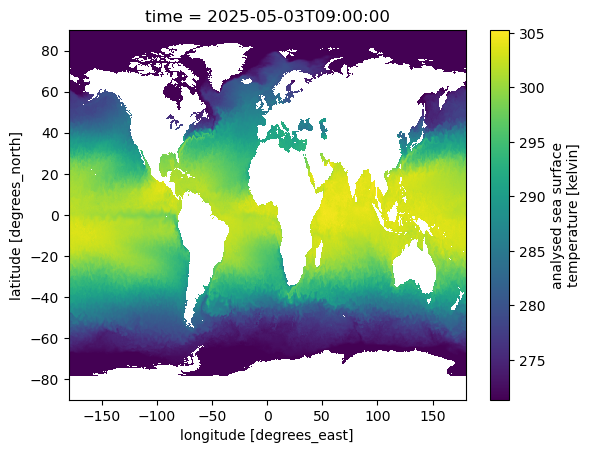

In [74]:
sst.analysed_sst.plot()

:::{admonition} Vocabulary
:class: tip
**Metadata:** information that describes your data, but isn’t the actual data values
:::

In [75]:
sst['analysed_sst'].sel(lat=slice(5, 65), lon=slice(-85, -36))

<xarray.DataArray 'analysed_sst' (time: 1, lat: 240, lon: 196)> Size: 376kB
[47040 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat      (lat) float32 960B 5.125 5.375 5.625 5.875 ... 64.38 64.62 64.88
  * lon      (lon) float32 784B -84.88 -84.62 -84.38 ... -36.62 -36.38 -36.12
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                Interim near-real-time (nrt) version using Multi-...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

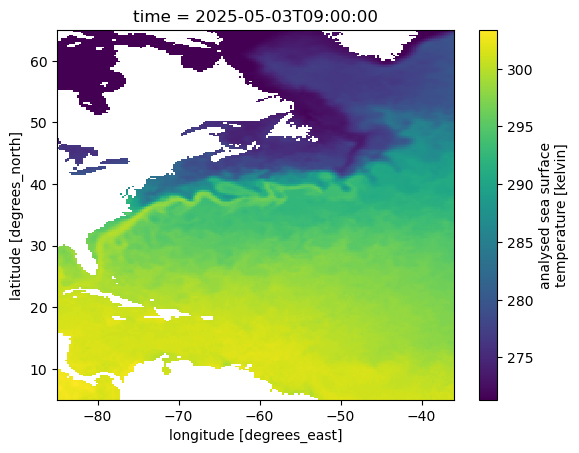

In [76]:
sst['analysed_sst'].sel(lat=slice(5, 65), lon=slice(-85, -36)).plot()

### Opening an HDF file with xarray

Example dataset: Icesat-2 lidar `ATL03` ([https://nsidc.org/data/atl03/versions/6](https://nsidc.org/data/atl03/versions/6))

- download url: [https://n5eil01u.ecs.nsidc.org/DP9/ATLAS/ATL03.006/2025.03.02/ATL03_20250302230238_11732613_006_01.h5](https://n5eil01u.ecs.nsidc.org/DP9/ATLAS/ATL03.006/2025.03.02/ATL03_20250302230238_11732613_006_01.h5)

- exploring HDF file groups: [https://myhdf5.hdfgroup.org](https://myhdf5.hdfgroup.org) (or double click on the file name in cryocloud)

## Let's do it again

* MODIS Aqua Chorophyll `MODISA_L3m_CHL` (Download url: https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20250531.L3m.DAY.CHL.chlor_a.4km.nc)

## Practice Question

Open the `oisst-avhrr-v02r01.20220304.nc` file from the `data` folder. Answer the following questions about the dataset:

1. What variables or measurements are available in this dataset?
2. How is the dataset organized? What is the shape or size?
3. What spatial and/or temporal range does this dataset cover?
4. Make the simplest plot possible of 1-2 variables. Does it match your expectations?
5. Crop the file to a smaller spatial area

## Practice Question Answers

### Practice Question

For this question we will use a sample dataset that is included with xarray. Run the line below to create the `air_temps` dataset

In [41]:
air_temps = xr.tutorial.load_dataset('air_temperature')

In [44]:
air_temps

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

**A)** Is `air_temps` a `DataArray` or a `Dataset`?

* `Dataset` -- you can tell because it says `Dataset` in the upper left corner of the output, and also because there is a "Data variables" drop down tab.

**B)** How many dimensions does the dataset have? What are they?

* 3 dimensions: lat, lon and time

**C)** Get the `air` data variable from the Dataset and assign it to a new Python variable

In [57]:
air_da = air_temps.air

**D)** Make a plot of the air temperature at all latitudes and longitudes for January 1st 2013 at 0:00 (midnight).

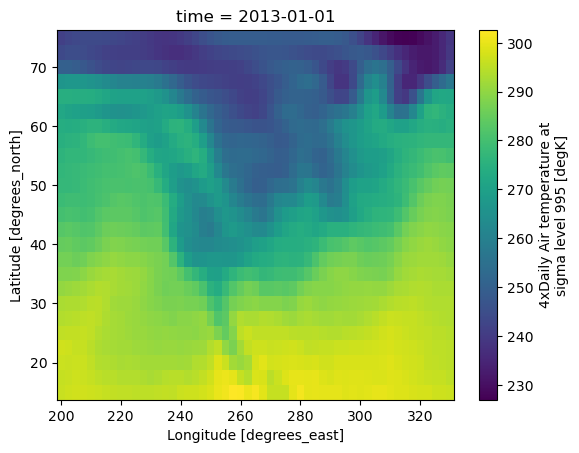

In [59]:
air_da.sel(time='2013-01-01T00:00:00.000000000').plot()

**BONUS 1)** Subset the data to only the data between 50 and 20$^o$N and 110 and 60$^o$E (Note: the longitude is labelled from 0 to 360 instead of -180 to 180, so 110-60$^o$E is 250-300 longitude in this dataset).

Plot any the data for this region for any one time.

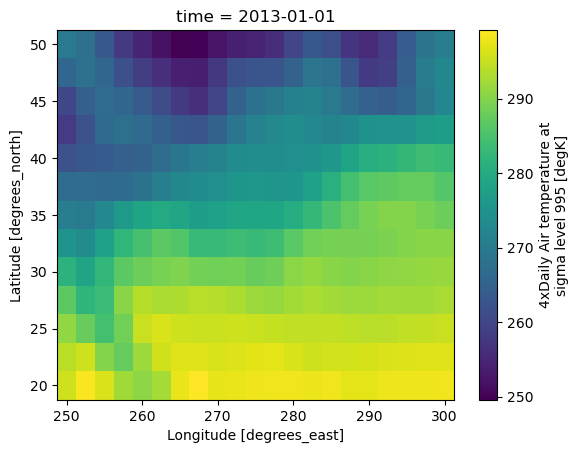

In [56]:
air_temps.air.sel(lat=slice(50, 20), lon=slice(250, 300)).isel(time=0).plot()

**BONUS 2)** You'll notice in the output that Datasets (and DataArrays) can also contain _Attributes_ which provide additional descriptions of the data (ex. title, description). Use the `.attrs` property to access the attributes dictionary. Print the name of the platform for this data.

Look next at the attributes for the air data variable. What are the units for the `air` data variable?

In [63]:
air_temps.attrs['platform']

'Model'

In [65]:
air_da.attrs['units']

'degK'